<a href="https://colab.research.google.com/github/EdWangLoDaSc/Bayesian-Neural-Networks/blob/master/AE%20for%20aidd_684.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is necessary to use tensorflow 1.14.0 under the environment of Colab.

In [1]:
pip install tensorflow==1.14.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 44 kB/s 
     |████████████████████████████████| 3.1 MB 39.4 MB/s 
     |████████████████████████████████| 488 kB 52.1 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949
ERROR: pip's dependency resolver does not currently ta

In [67]:
from google.colab import drive
drive.mount('./content')

Drive already mounted at ./content; to attempt to forcibly remount, call drive.mount("./content", force_remount=True).


In [66]:
import pandas as pd
import numpy as np
## TensorFlow
import tensorflow as tf
#tf.compat.v1.reset_default_graph()

In [69]:
df = pd.read_csv('/content/content/MyDrive/684_including res.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,291.1,292.1,293.1,294.1,295.1,296.1,297.1,298.1,299.1,Calculated-pChEMBL
0,0.000000,0.398866,0.552342,0.000000,0.000000,0.447771,0.000000,0.000000,0.000000,0.245145,...,7.002199,7.995675,-1.298759,-4.972463,-1.494918,-3.160100,-2.799094,-6.875554,-1.172918,1
1,0.020386,0.636703,0.000000,0.000000,0.179800,0.397494,0.133430,0.000000,0.000000,0.000000,...,7.302654,7.864704,-0.889803,-4.904260,-1.948082,-3.225288,-2.340367,-7.029595,-1.233970,1
2,0.134436,0.421601,0.189464,0.000000,0.301471,0.059564,0.000000,0.000000,0.288941,0.578386,...,7.285273,7.857326,-1.140294,-4.725398,-1.934301,-3.314591,-2.396654,-7.086988,-1.385098,1
3,0.348222,0.000000,0.515882,0.000000,0.000000,0.309615,0.369721,0.000000,0.000000,0.000000,...,9.687845,16.614166,-1.540868,-6.952596,-0.767967,-4.525165,-3.143141,-11.361431,-0.983733,1
4,1.203286,0.000000,0.371778,0.430192,0.898479,0.000000,0.000000,0.000000,0.273444,0.000000,...,11.433891,16.667095,-0.666048,-8.178328,-2.673410,-10.390429,-6.457333,-14.542483,-1.971859,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,0.188174,0.000000,0.000000,0.000000,0.759882,0.000000,1.328484,0.000000,0.000000,0.190577,...,11.832930,8.489217,-2.941147,-11.265771,-5.634036,-8.247539,-3.248003,-13.158752,-0.488183,3
927,0.065322,0.000000,0.953836,0.233956,0.000000,0.531739,0.000000,0.000000,0.308702,0.000000,...,12.635477,2.798072,-0.175685,-8.594655,-4.391715,-8.663897,-2.166969,-9.415674,-0.033140,3
928,0.425329,0.000000,0.000000,0.242471,0.000000,0.042116,0.000000,0.173591,0.000000,0.000000,...,16.218197,8.536611,-2.094327,-13.039205,-1.405485,-9.525869,-2.848432,-11.367699,-0.871449,3
929,1.125325,0.000000,1.611651,0.000000,0.000000,0.242153,0.000000,0.786912,0.093479,0.909088,...,15.294490,9.235289,-1.287450,-11.797807,-1.341567,-10.067979,-2.375413,-9.433397,-1.136853,3


In [70]:
df = pd.read_csv('/content/content/MyDrive/684_including res.csv')
from sklearn.utils import shuffle
df = shuffle(df)

from sklearn.preprocessing import StandardScaler
x = StandardScaler()

df_x = x.fit_transform(df.drop(['Calculated-pChEMBL'], axis =1))
y = df['Calculated-pChEMBL']


In [71]:
num_inputs = 684
np.random.seed(42)
## Encoder section
hidden_1 = 384     ## 256 (Number of nodes)

num_outputs = num_inputs ## 512
learning_rate = 0.0001
num_epochs = 5000
batch_size = 100

activ_fn = tf.nn.leaky_relu

X = tf.compat.v1.placeholder(tf.float32,shape = [None,num_inputs])
initializer = tf.contrib.layers.variance_scaling_initializer()

w1 = tf.Variable(initializer([num_inputs,hidden_1]),dtype=tf.float32)

w2 = tf.transpose(w1)

b1 = tf.Variable(tf.zeros(hidden_1))

b2 = tf.Variable(tf.zeros(num_outputs))

hid_layer1 = activ_fn(tf.matmul(X,w1)+b1)

output_layer = activ_fn(tf.matmul(hid_layer1,w2)+b2)

loss = tf.reduce_mean(tf.square(output_layer - X))

optimizer = tf.train.RMSPropOptimizer(learning_rate)

## Optimizer
train = optimizer.minimize(loss)


## Initialzing
init = tf.global_variables_initializer()

saver = tf.train.Saver()

to_plot = []

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for index, offset in enumerate(range(0, df_x.shape[0], batch_size)):
            xs = df_x[offset: offset + batch_size]
            #print(offset)
            sess.run(train, feed_dict={X: xs})
        training_loss = loss.eval(feed_dict={X: xs})
        to_plot.append(training_loss)
        print("Epoch: {} Loss: {}".format(epoch,training_loss))
        
        
    """
    Saving the trained model
    """
    saver.save(sess,'./checkpoint/my_model')

Epoch: 0 Loss: 1.218284249305725
Epoch: 1 Loss: 1.2166359424591064
Epoch: 2 Loss: 1.2138762474060059
Epoch: 3 Loss: 1.2092928886413574
Epoch: 4 Loss: 1.2017853260040283
Epoch: 5 Loss: 1.189792275428772
Epoch: 6 Loss: 1.1712673902511597
Epoch: 7 Loss: 1.1441508531570435
Epoch: 8 Loss: 1.1074143648147583
Epoch: 9 Loss: 1.0618338584899902
Epoch: 10 Loss: 1.0084481239318848
Epoch: 11 Loss: 0.9476253986358643
Epoch: 12 Loss: 0.8791100978851318
Epoch: 13 Loss: 0.8065848350524902
Epoch: 14 Loss: 0.7360079288482666
Epoch: 15 Loss: 0.6722433567047119
Epoch: 16 Loss: 0.6148686408996582
Epoch: 17 Loss: 0.5625735521316528
Epoch: 18 Loss: 0.5170975923538208
Epoch: 19 Loss: 0.47651606798171997
Epoch: 20 Loss: 0.4412899613380432
Epoch: 21 Loss: 0.40959906578063965
Epoch: 22 Loss: 0.3822422921657562
Epoch: 23 Loss: 0.35971516370773315
Epoch: 24 Loss: 0.34062036871910095
Epoch: 25 Loss: 0.32446786761283875
Epoch: 26 Loss: 0.31056278944015503
Epoch: 27 Loss: 0.2984943985939026
Epoch: 28 Loss: 0.28778490

In [73]:
## With the weights obtained from training earlier, lets obtains the feature vectors at the latent space
with tf.Session() as sess:
    saver.restore(sess,'./checkpoint/my_model')
    res = hid_layer1.eval(feed_dict={X: df_x})

In [59]:
res = pd.DataFrame(res)
res.to_csv('res_.003.csv')

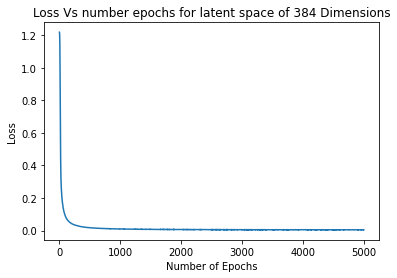

In [74]:
## Visualizing
import matplotlib.pyplot as plt
plt.plot(to_plot)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs number epochs for latent space of 384 Dimensions")
plt.show()

In [61]:
y = pd.read_csv('/content/content/MyDrive/AIDD_AVI_BNN/Datasets/all_structures.csv')
y = y['Calculated pChEMBL'].values

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(58, -70, 'pChEMBL Value')

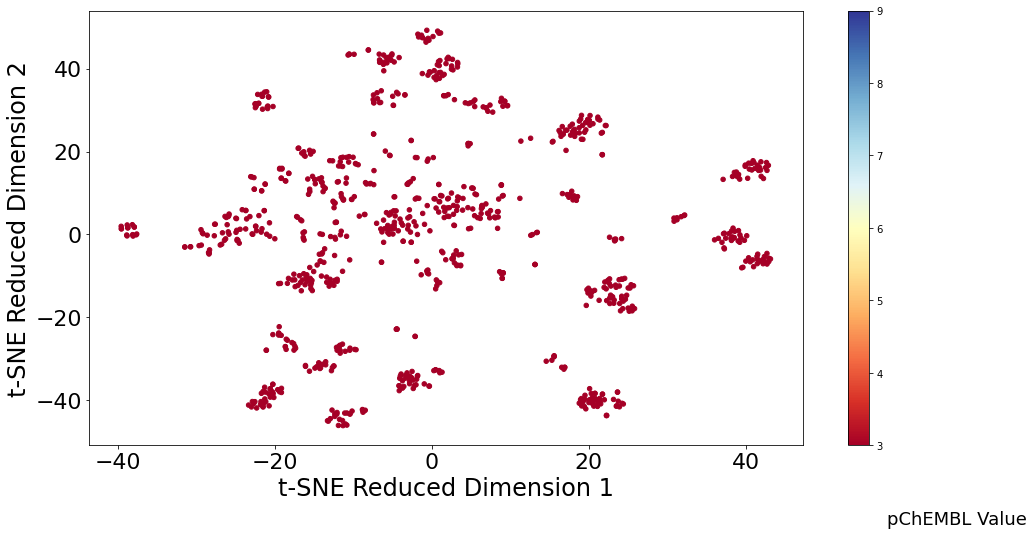

In [76]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
x_values = res


y = y.ravel()
tsne_descriptors = TSNE(n_components=2, random_state = 42)
x_tsne = tsne_descriptors.fit_transform(res)


# draw tsne
cm = plt.cm.get_cmap('RdYlBu')
plt.figure(figsize=(16, 8))
plt.xticks(size = 22)
plt.yticks(size = 22)
plt.xlabel('t-SNE Reduced Dimension 1',fontproperties = 'Times New Roman', size = 24)
plt.ylabel('t-SNE Reduced Dimension 2',fontproperties = 'Times New Roman', size = 24)
plt.scatter(x_tsne[:, 0], x_tsne[:,1],c= y,vmin= 3, vmax= 9, s= 20, cmap=cm)
plt.colorbar()
plt.text(58, -70, "pChEMBL Value", fontproperties = 'Times New Roman', size = 18)


In [ ]:
res.shape
dr = pd.DataFrame(res)
print(dr)
dr.to_csv('loss_41.csv')

               0          1
0      45.786255  18.553926
1      48.318661   0.000000
2       6.472098  20.004210
3      44.899738   1.128664
4      22.137346   0.000000
...          ...        ...
78182  46.846451  47.101852
78183  51.056786  18.359499
78184  47.878277  18.481775
78185  48.216587  18.464272
78186  36.181614  53.617195

[78187 rows x 2 columns]


In [ ]:
target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(df_x[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


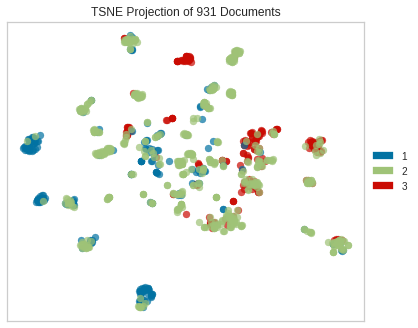

In [78]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer()
tsne.fit(res, y)
tsne.show()